# Plotting Reconnected Flux
In this notebook, we will take what we learned from plotting individual frame and plot the reconnected flux of the model. The goal is to see how the flux changes and to compare it to other simulation schemes. This will provide a more concrete example of the differences are and what exactly fast reconnection means. With this self contained example we have a more set structure, first we have a cell to import all the packages

In [4]:
import numpy as np
%cd /home/kasaiyuki/pgkylFrontEnd/ 
from utils import gkData
import matplotlib.pyplot as plt
%matplotlib inline

/home/kasaiyuki/pgkylFrontEnd


Then we set up the parameters and variables, then get the data from the simulation files

In [5]:
# import scipy as sp
params = {} # Initialize dictionary to store plotting and other parameters

# Tested to handle g0 and g2: VM, 5M, 10M
# Requires a _params.txt file in your data directory of the form gkeyllOutputBasename_params.txt! See example_params.txt for formatting

paramsFile = '/home/kasaiyuki/pgkylFrontEnd/rt-5m-gem-params.txt'
fileNum = 0
suffix = '.gkyl'
varid = 'psi' # See table of choices in README
nFrame = 50 # Number of frames used in the generating file - corresponds to number of output file sets made
dpsi = [0] * nFrame # Created "empty" list

In [6]:
%%capture 
# above "cell magic" command discards output for this cell
for i in range(50):
  var = gkData.gkData(paramsFile,fileNum,suffix,varid,params)
  var.readData()
  data = var.data
  coords = var.coords
  dx = coords[0][1]-coords[0][0]
  # arr = data[:, len(data[0])//2] #data can be replaced by data[:, len()-1] or average of two
  # arr =  [abs(x) for x in arr]
  # integral.append(0.5*np.sum(arr, axis=0)*dx)
  dpsi[i] = data[len(coords[0])//2, len(coords[1])//2] - data[-1, len(coords[1])//2]
  fileNum += 1


fileNum = 0

Now we plot the results

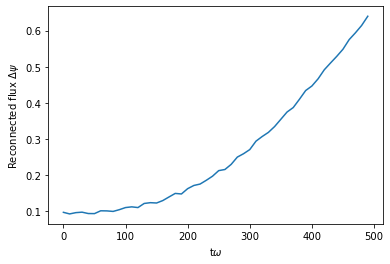

In [7]:
t = np.arange(0, len(dpsi))
omega = 1 * 0.1 / 1 # (cyclotron frequency) omega = qB/m
plt.plot(t/omega, dpsi)
plt.ylabel('Reconnected flux $\Delta\psi$')
plt.xlabel("t$\omega$")
plt.show()